In [1]:
!pwd
import sys
sys.executable

/c/Users/shingo/jupyter_notebook/tfgpu_py36_work/02_keras_py/experiment/01_code_test


'C:\\Users\\shingo\\Anaconda3\\envs\\tfgpu113\\python.exe'

# model.keras_visualize_cnn.py テスト

In [2]:
# モジュールimport
import os, sys
current_dir = os.path.dirname(os.path.abspath("__file__"))
path = os.path.join(current_dir, '../../')
sys.path.append(path)

from model import keras_visualize_cnn
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))# デフォルトは75%

C:\Users\shingo\Anaconda3\envs\tfgpu113\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


EfficientNetB3で試す

In [3]:
import os
from model import define_model

output_dir = r'D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190531\train_all'
model_EfficientNetB3_path = os.path.join(output_dir, 'finetuning.h5')
model_EfficientNetB3, orig_model = define_model.get_fine_tuning_model(
    output_dir
    , 331, 331, 3
    , 11
    , 'EfficientNet', 190
    , FCnum=2
    , activation='softmax'
    , add_se=False
    , efficientnet_num=3
)
model_EfficientNetB3.load_weights(model_EfficientNetB3_path)

define_model.py: loaded as module file
----- model_param -----
output_dir = D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190531\train_all
img_rows img_cols channels = 331 331 3
num_classes = 11
choice_model trainable = EfficientNet 190
FCnum = 2
FCpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
EfficientNetB3
input_shape: (331, 331, 3)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
----- FC_layer -----
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
dence dropout addBatchNorm kernel_initializer l2_rate = 1024 0.5 None he_normal 0.0001
dence dropout addBatchNorm kernel_initializer l2_rate = 512 0.5 None he_normal 0.00

In [4]:
define_model.print_model_summary(model_EfficientNetB3)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 331, 331, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 166, 166, 40) 1080        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 166, 166, 40) 160         conv2d_1[0][0]                   
__________________________________________________________________________________________________
swish_1 (Swish)                 (None, 166, 166, 40) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
depthwise_

2 batch_normalization_1 True
3 swish_1 False
4 depthwise_conv2d_1 False
5 batch_normalization_2 True
6 swish_2 False
7 lambda_1 False
8 conv2d_2 False
    weights.shape:(1, 1, 40, 10)
9 swish_3 False
10 conv2d_3 False
    weights.shape:(1, 1, 10, 40)
11 activation_1 False
12 multiply_1 False
13 conv2d_4 False
14 batch_normalization_3 True
15 depthwise_conv2d_2 False
16 batch_normalization_4 True
17 swish_4 False
18 lambda_2 False
19 conv2d_5 False
    weights.shape:(1, 1, 24, 6)
20 swish_5 False
21 conv2d_6 False
    weights.shape:(1, 1, 6, 24)
22 activation_2 False
23 multiply_2 False
24 conv2d_7 False
25 batch_normalization_5 True
26 drop_connect_1 False
27 add_1 False
28 conv2d_8 False
29 batch_normalization_6 True
30 swish_6 False
31 depthwise_conv2d_3 False
32 batch_normalization_7 True
33 swish_7 False
34 lambda_3 False
35 conv2d_9 False
    weights.shape:(1, 1, 144, 6)
36 swish_8 False
37 conv2d_10 False
    weights.shape:(1, 1, 6, 144)
38 activation_3 False
39 multiply_3 False


308 swish_60 True
309 depthwise_conv2d_21 True
310 batch_normalization_61 True
311 swish_61 True
312 lambda_21 True
313 conv2d_81 True
    weights.shape:(1, 1, 1392, 58)
314 swish_62 True
315 conv2d_82 True
    weights.shape:(1, 1, 58, 1392)
316 activation_21 True
317 multiply_21 True
318 conv2d_83 True
319 batch_normalization_62 True
320 drop_connect_15 True
321 add_15 True
322 conv2d_84 True
323 batch_normalization_63 True
324 swish_63 True
325 depthwise_conv2d_22 True
326 batch_normalization_64 True
327 swish_64 True
328 lambda_22 True
329 conv2d_85 True
    weights.shape:(1, 1, 1392, 58)
330 swish_65 True
331 conv2d_86 True
    weights.shape:(1, 1, 58, 1392)
332 activation_22 True
333 multiply_22 True
334 conv2d_87 True
335 batch_normalization_65 True
336 drop_connect_16 True
337 add_16 True
338 conv2d_88 True
339 batch_normalization_66 True
340 swish_66 True
341 depthwise_conv2d_23 True
342 batch_normalization_67 True
343 swish_67 True
344 lambda_23 True
345 conv2d_89 True
    wei

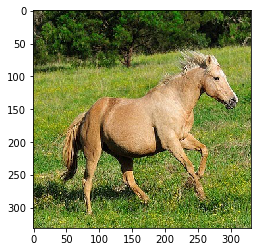

In [5]:
import keras
model = model_EfficientNetB3
jpg = r'horse.jpg'
shape = [model.input.shape[1].value, model.input.shape[2].value, model.input.shape[3].value]
img = keras.preprocessing.image.load_img(jpg, target_size=shape[:2])

import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [6]:
from transformer import get_train_valid_test
jpg = r'horse.jpg'
X = get_train_valid_test.load_one_img(jpg, 331, 331)

ndimage.py: loaded as module file
my_generator.py: loaded as module file
get_train_valid_test.py: loaded as module file


CNN中間層出力の可視化

layer.name batch_normalization_1
features.shape (1, 166, 166, 40)
kernel_num 40
len(feature_imgs): 40
(5, 8)
output: output_test\visual_cnn\batch_normalization_1.png


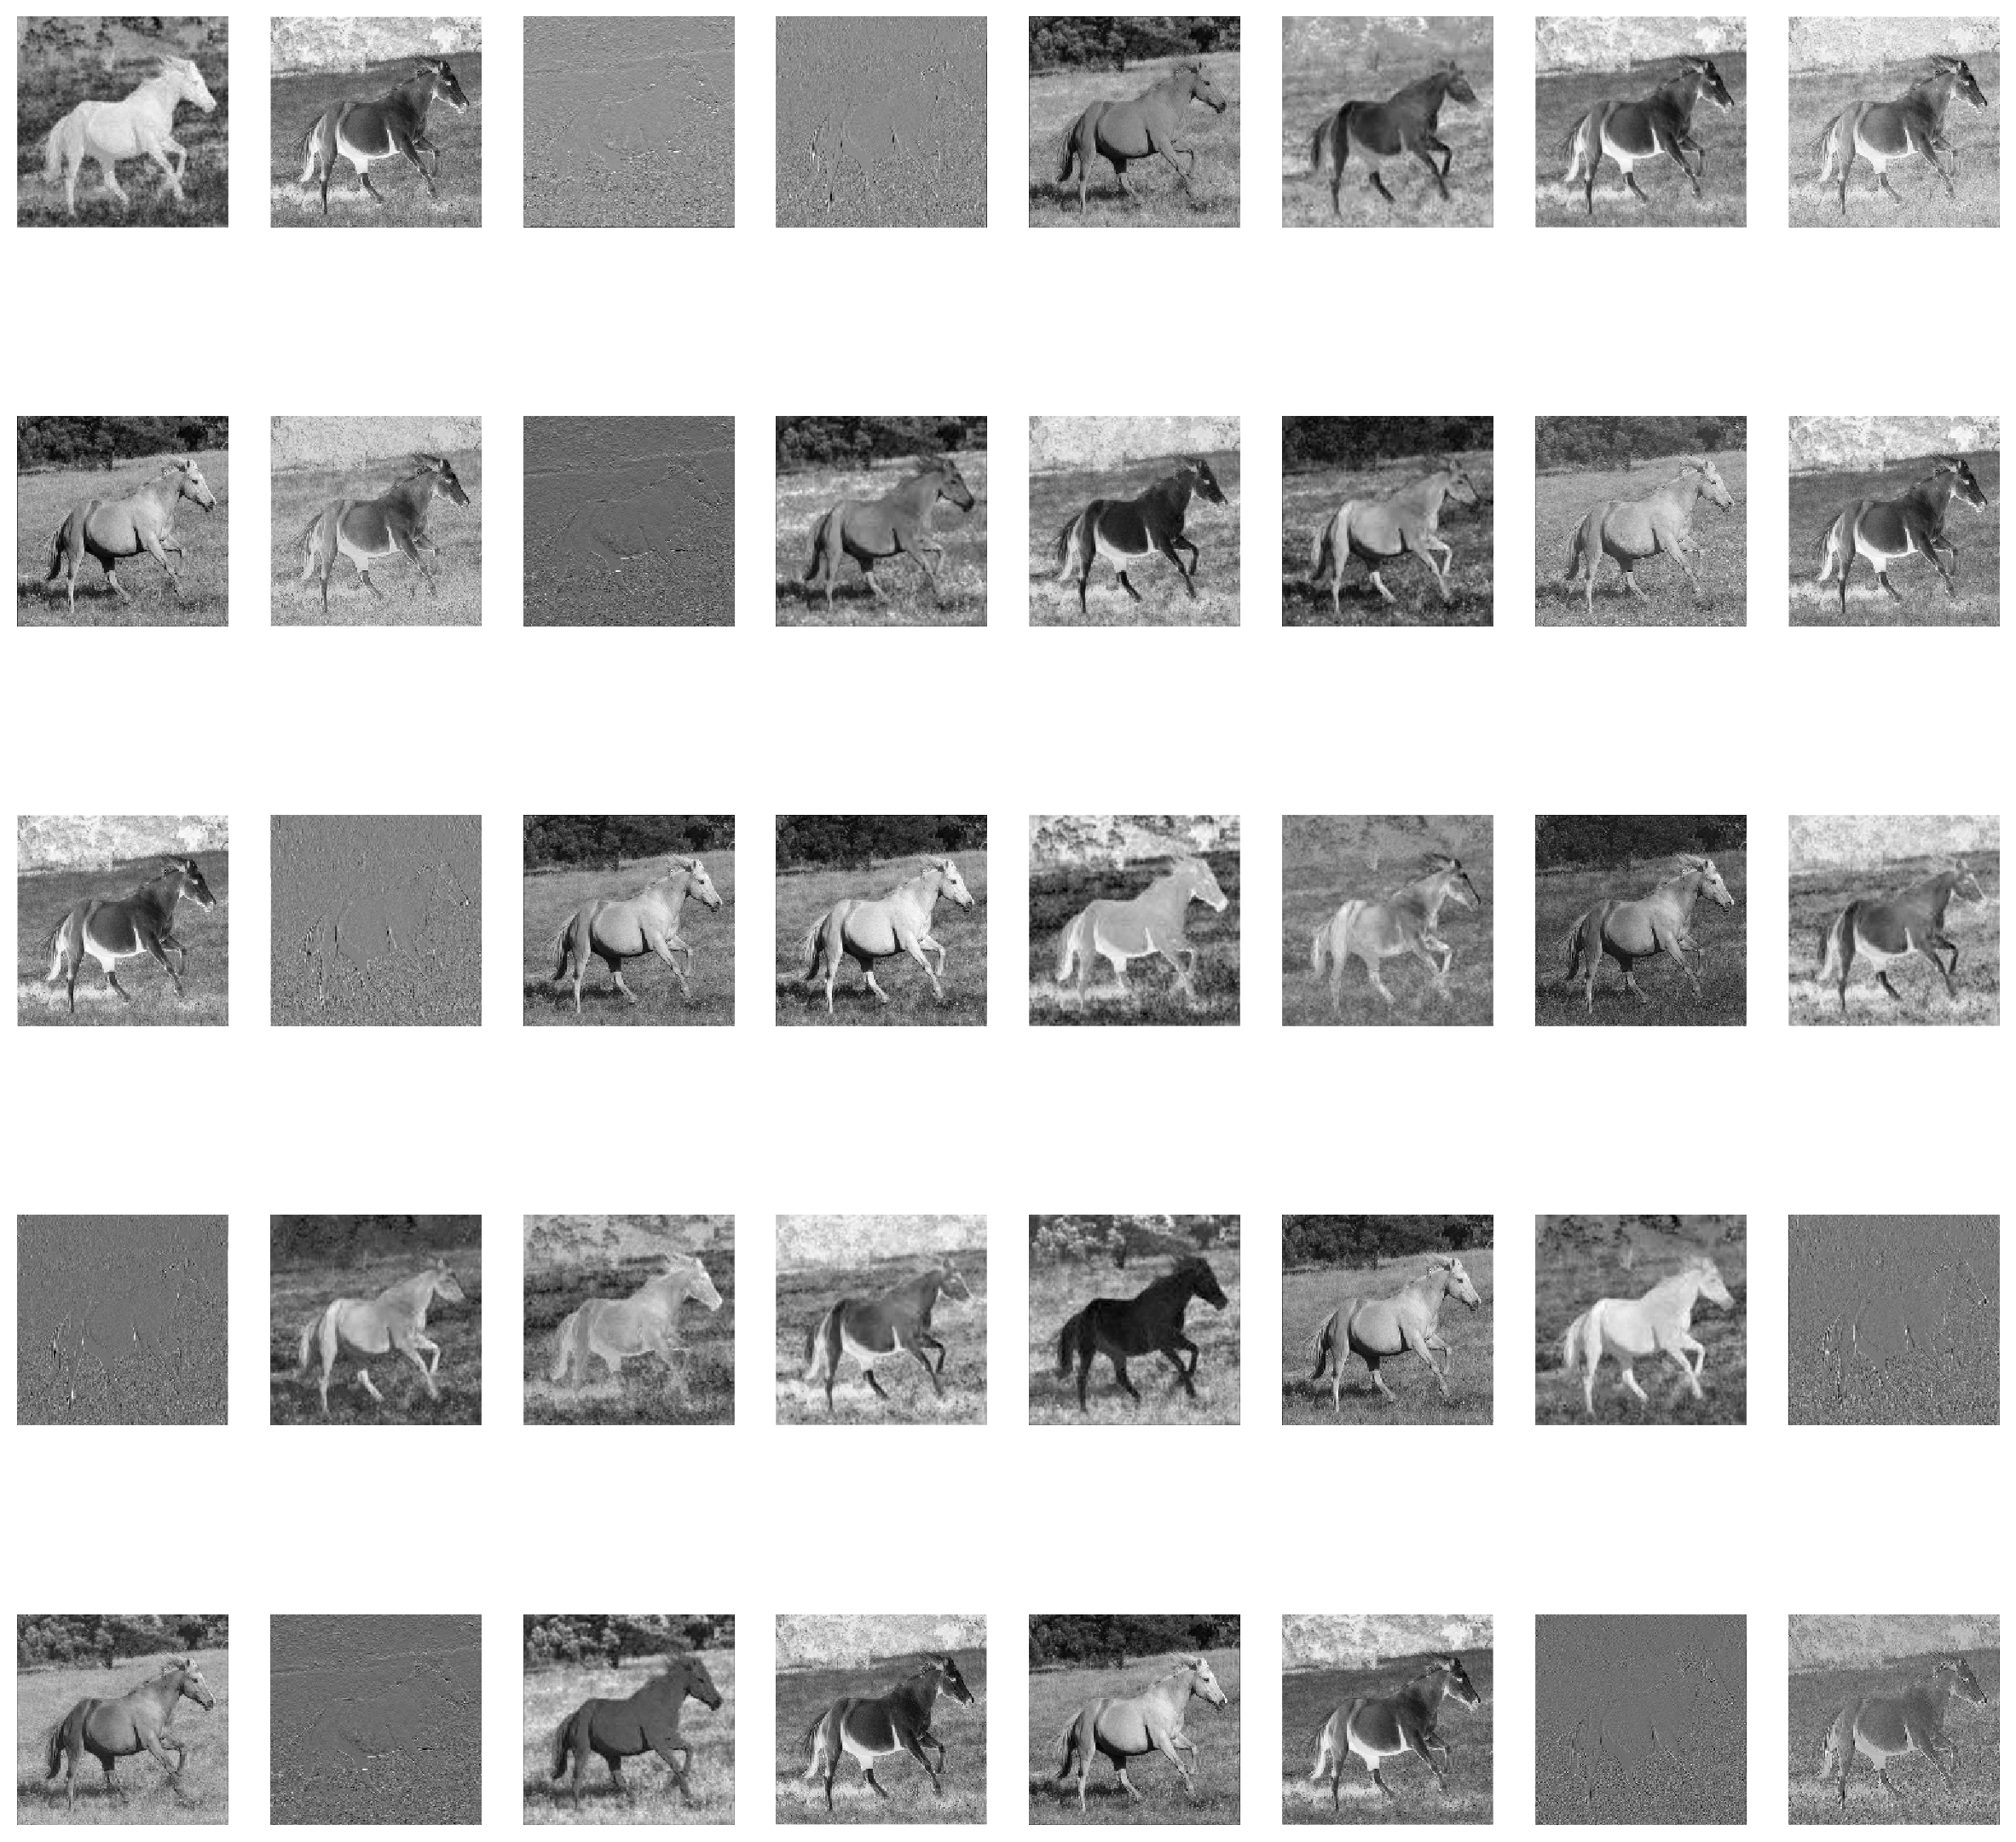

In [7]:
layer_id = 2
output_dir = r'output_test\visual_cnn'
keras_visualize_cnn.visual_cnn_output(model_EfficientNetB3, X, layer_id, output_dir=output_dir)

モデルのcnnカーネル（フィルター）の重みを可視化

In [8]:
output_dir = r'output_test\visual_cnn'
keras_visualize_cnn.visual_cnn_kernel(model_EfficientNetB3, output_dir=output_dir)

layer_id None
### weights.shapeのチャネルが3の層ないので可視化できない ###


TypeError: list indices must be integers or slices, not NoneType

引数:vis_keras_layersで指定した種類の層に全て対してCNN中間層出力の可視化を行う

In [9]:
#vis_keras_layers = keras.layers.Activation
vis_keras_layers = keras.layers.Conv2D
output_dir = r'output_test\visual_cnn'
keras_visualize_cnn.make_intermediate_images(model_EfficientNetB3, X, vis_keras_layers=vis_keras_layers, output_dir=output_dir)

 0: (1, 166, 166, 40)
 1: (1, 166, 166, 40)
 2: (1, 166, 166, 40)
 3: (1, 166, 166, 40)
 4: (1, 166, 166, 40)
 5: (1, 166, 166, 40)
 6: (1, 1, 1, 40)
 7: (1, 1, 1, 10)
 8: (1, 1, 1, 10)
 9: (1, 1, 1, 40)
10: (1, 1, 1, 40)
11: (1, 166, 166, 40)
12: (1, 166, 166, 24)
13: (1, 166, 166, 24)
14: (1, 166, 166, 24)
15: (1, 166, 166, 24)
16: (1, 166, 166, 24)
17: (1, 1, 1, 24)
18: (1, 1, 1, 6)
19: (1, 1, 1, 6)
20: (1, 1, 1, 24)
21: (1, 1, 1, 24)
22: (1, 166, 166, 24)
23: (1, 166, 166, 24)
24: (1, 166, 166, 24)
25: (1, 166, 166, 24)
26: (1, 166, 166, 24)
27: (1, 166, 166, 144)
28: (1, 166, 166, 144)
29: (1, 166, 166, 144)
30: (1, 83, 83, 144)
31: (1, 83, 83, 144)
32: (1, 83, 83, 144)
33: (1, 1, 1, 144)
34: (1, 1, 1, 6)
35: (1, 1, 1, 6)
36: (1, 1, 1, 144)
37: (1, 1, 1, 144)
38: (1, 83, 83, 144)
39: (1, 83, 83, 32)
40: (1, 83, 83, 32)
41: (1, 83, 83, 192)
42: (1, 83, 83, 192)
43: (1, 83, 83, 192)
44: (1, 83, 83, 192)
45: (1, 83, 83, 192)
46: (1, 83, 83, 192)
47: (1, 1, 1, 192)
48: (1, 1, 1, 8)
49

output: output_test\visual_cnn\conv2d_1.png
num_of_image 40
output: output_test\visual_cnn\depthwise_conv2d_1.png
num_of_image 10
output: output_test\visual_cnn\conv2d_2.png
num_of_image 40
output: output_test\visual_cnn\conv2d_3.png
num_of_image 24
output: output_test\visual_cnn\conv2d_4.png
num_of_image 24
output: output_test\visual_cnn\depthwise_conv2d_2.png
num_of_image 6
output: output_test\visual_cnn\conv2d_5.png
num_of_image 24
output: output_test\visual_cnn\conv2d_6.png
num_of_image 24
output: output_test\visual_cnn\conv2d_7.png
num_of_image 144
output: output_test\visual_cnn\conv2d_8.png
num_of_image 144
output: output_test\visual_cnn\depthwise_conv2d_3.png
num_of_image 6
output: output_test\visual_cnn\conv2d_9.png
num_of_image 144
output: output_test\visual_cnn\conv2d_10.png
num_of_image 32
output: output_test\visual_cnn\conv2d_11.png
num_of_image 192
output: output_test\visual_cnn\conv2d_12.png
num_of_image 192
output: output_test\visual_cnn\depthwise_conv2d_4.png
num_of_ima

output: output_test\visual_cnn\conv2d_104.png


In [10]:
dir(keras.layers)

['Activation',
 'ActivityRegularization',
 'Add',
 'AlphaDropout',
 'AtrousConv1D',
 'AtrousConv2D',
 'AtrousConvolution1D',
 'AtrousConvolution2D',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'Concatenate',
 'Conv1D',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM2D',
 'ConvLSTM2DCell',
 'ConvRNN2D',
 'ConvRecurrent2D',
 'Convolution1D',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'CuDNNGRU',
 'CuDNNLSTM',
 'Deconv2D',
 'Deconv3D',
 'Deconvolution2D',
 'Deconvolution3D',
 'Dense',
 'DepthwiseConv2D',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalMaxPool1D',
 'GlobalMaxPoo

gifにして確認

In [11]:
import glob
output_dir = r'output_test\visual_cnn'
image_paths = sorted(glob.glob(os.path.join(output_dir, 'conv2d*png')))

from dataset import util
util.creat_gif_from_images(os.path.join(output_dir, 'conv2d.gif'), image_paths)

util.py: loaded as module file


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\shingo\\jupyter_notebook\\tfgpu_py36_work\\02_keras_py\\experiment\\01_code_test\\output_test\\visual_cnn\\conv2d.gif'

In [ ]:
from IPython.display import Image
with open(os.path.join(output_dir, 'conv2d.gif'),'rb') as f:
    display(Image(data=f.read(), format='png'))

In [13]:
import glob
output_dir = r'output_test\visual_cnn'
image_paths = sorted(glob.glob(os.path.join(output_dir, 'activation*png')))

from dataset import util
util.creat_gif_from_images(os.path.join(output_dir, 'activation.gif'), image_paths)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\shingo\\jupyter_notebook\\tfgpu_py36_work\\02_keras_py\\experiment\\01_code_test\\output_test\\visual_cnn\\activation.gif'

In [ ]:
from IPython.display import Image
with open(os.path.join(output_dir, 'activation.gif'),'rb') as f:
    display(Image(data=f.read(), format='png'))

コマンドラインから実行可能

InceptionResNetV2で試す

In [15]:
import keras
model_path = r"D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190529\train_all\finetuning.h5"
model = keras.models.load_model(model_path, compile=False)

In [16]:
from model import define_model
define_model.print_model_summary(model)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 331, 331, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 165, 165, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 165, 165, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 165, 165, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

__________________________________________________________________________________________________
batch_normalization_145 (BatchN (None, 19, 19, 192)  576         conv2d_145[0][0]                 
__________________________________________________________________________________________________
batch_normalization_148 (BatchN (None, 19, 19, 192)  576         conv2d_148[0][0]                 
__________________________________________________________________________________________________
activation_145 (Activation)     (None, 19, 19, 192)  0           batch_normalization_145[0][0]    
__________________________________________________________________________________________________
activation_148 (Activation)     (None, 19, 19, 192)  0           batch_normalization_148[0][0]    
__________________________________________________________________________________________________
block17_18_mixed (Concatenate)  (None, 19, 19, 384)  0           activation_145[0][0]             
          

2 batch_normalization_1 True
3 activation_1 False
4 conv2d_2 False
5 batch_normalization_2 True
6 activation_2 False
7 conv2d_3 False
8 batch_normalization_3 True
9 activation_3 False
10 max_pooling2d_1 False
11 conv2d_4 False
12 batch_normalization_4 True
13 activation_4 False
14 conv2d_5 False
15 batch_normalization_5 True
16 activation_5 False
17 max_pooling2d_2 False
18 conv2d_9 False
19 batch_normalization_9 True
20 activation_9 False
21 conv2d_7 False
22 conv2d_10 False
23 batch_normalization_7 True
24 batch_normalization_10 True
25 activation_7 False
26 activation_10 False
27 average_pooling2d_1 False
28 conv2d_6 False
29 conv2d_8 False
30 conv2d_11 False
31 conv2d_12 False
32 batch_normalization_6 True
33 batch_normalization_8 True
34 batch_normalization_11 True
35 batch_normalization_12 True
36 activation_6 False
37 activation_8 False
38 activation_11 False
39 activation_12 False
40 mixed_5b False
41 conv2d_16 False
42 batch_normalization_16 True
43 activation_16 False
44 conv

    weights.shape:(1, 1, 384, 1088)
321 block17_3 True
322 block17_3_ac True
323 conv2d_90 True
324 batch_normalization_90 True
325 activation_90 True
326 conv2d_91 True
327 batch_normalization_91 True
328 activation_91 True
329 conv2d_89 True
330 conv2d_92 True
331 batch_normalization_89 True
332 batch_normalization_92 True
333 activation_89 True
334 activation_92 True
335 block17_4_mixed True
336 block17_4_conv True
    weights.shape:(1, 1, 384, 1088)
337 block17_4 True
338 block17_4_ac True
339 conv2d_94 True
340 batch_normalization_94 True
341 activation_94 True
342 conv2d_95 True
343 batch_normalization_95 True
344 activation_95 True
345 conv2d_93 True
346 conv2d_96 True
347 batch_normalization_93 True
348 batch_normalization_96 True
349 activation_93 True
350 activation_96 True
351 block17_5_mixed True
352 block17_5_conv True
    weights.shape:(1, 1, 384, 1088)
353 block17_5 True
354 block17_5_ac True
355 conv2d_98 True
356 batch_normalization_98 True
357 activation_98 True
358 c

625 conv2d_167 True
626 batch_normalization_164 True
627 batch_normalization_167 True
628 activation_164 True
629 activation_167 True
630 block8_1_mixed True
631 block8_1_conv True
    weights.shape:(1, 1, 448, 2080)
632 block8_1 True
633 block8_1_ac True
634 conv2d_169 True
635 batch_normalization_169 True
636 activation_169 True
637 conv2d_170 True
638 batch_normalization_170 True
639 activation_170 True
640 conv2d_168 True
641 conv2d_171 True
642 batch_normalization_168 True
643 batch_normalization_171 True
644 activation_168 True
645 activation_171 True
646 block8_2_mixed True
647 block8_2_conv True
    weights.shape:(1, 1, 448, 2080)
648 block8_2 True
649 block8_2_ac True
650 conv2d_173 True
651 batch_normalization_173 True
652 activation_173 True
653 conv2d_174 True
654 batch_normalization_174 True
655 activation_174 True
656 conv2d_172 True
657 conv2d_175 True
658 batch_normalization_172 True
659 batch_normalization_175 True
660 activation_172 True
661 activation_175 True
662 bl

In [17]:
%run ../../model/keras_visualize_cnn.py --run_method "visual_cnn_output" \
                                        --output_dir "output_test\visual_cnn" \
                                        --img_path "horse.jpg" \
                                        --model_path "D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190529\train_all\finetuning.h5" \
                                        --layer_id 100

layer.name activation_25
features.shape (1, 39, 39, 32)
kernel_num 32
len(feature_imgs): 32
(4, 8)
output: output_test\visual_cnn\activation_25.png


C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py\model\keras_visualize_cnn.py:83: MatplotlibDeprecationWarning: Passing the block parameter of show() positionally is deprecated since Matplotlib 3.1; the parameter will become keyword-only in 3.3.
  plt.show(fig)
C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py\model\keras_visualize_cnn.py:83: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show(fig)


AttributeError: 'function' object has no attribute 'called'

In [18]:
%run ../../model/keras_visualize_cnn.py --run_method "visual_cnn_kernel" \
                                        --output_dir "output_test\visual_cnn" \
                                        --model_path "D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190529\train_all\finetuning.h5"

layer_id 1


ValueError: not enough values to unpack (expected 2, got 1)

AttributeError: 'function' object has no attribute 'called'

In [19]:
%run ../../model/keras_visualize_cnn.py --run_method "make_intermediate_images" \
                                        --output_dir "output_test\visual_cnn" \
                                        --img_path "horse.jpg" \
                                        --model_path "D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190529\train_all\finetuning.h5" \
                                        --vis_keras_layers "Activation"

define_model.py: loaded as module file
 0: (1, 165, 165, 32)
 1: (1, 165, 165, 32)
 2: (1, 165, 165, 32)
 3: (1, 163, 163, 32)
 4: (1, 163, 163, 32)
 5: (1, 163, 163, 32)
 6: (1, 163, 163, 64)
 7: (1, 163, 163, 64)
 8: (1, 163, 163, 64)
 9: (1, 81, 81, 64)
10: (1, 81, 81, 80)
11: (1, 81, 81, 80)
12: (1, 81, 81, 80)
13: (1, 79, 79, 192)
14: (1, 79, 79, 192)
15: (1, 79, 79, 192)
16: (1, 39, 39, 192)
17: (1, 39, 39, 64)
18: (1, 39, 39, 64)
19: (1, 39, 39, 64)
20: (1, 39, 39, 48)
21: (1, 39, 39, 96)
22: (1, 39, 39, 48)
23: (1, 39, 39, 96)
24: (1, 39, 39, 48)
25: (1, 39, 39, 96)
26: (1, 39, 39, 192)
27: (1, 39, 39, 96)
28: (1, 39, 39, 64)
29: (1, 39, 39, 96)
30: (1, 39, 39, 64)
31: (1, 39, 39, 96)
32: (1, 39, 39, 64)
33: (1, 39, 39, 96)
34: (1, 39, 39, 64)
35: (1, 39, 39, 96)
36: (1, 39, 39, 64)
37: (1, 39, 39, 96)
38: (1, 39, 39, 64)
39: (1, 39, 39, 320)
40: (1, 39, 39, 32)
41: (1, 39, 39, 32)
42: (1, 39, 39, 32)
43: (1, 39, 39, 32)
44: (1, 39, 39, 48)
45: (1, 39, 39, 32)
46: (1, 39, 39, 4

output: output_test\visual_cnn\activation_1.png
num_of_image 32
output: output_test\visual_cnn\activation_2.png
num_of_image 64
output: output_test\visual_cnn\activation_3.png
num_of_image 80
output: output_test\visual_cnn\activation_4.png
num_of_image 192
output: output_test\visual_cnn\activation_5.png
num_of_image 64
output: output_test\visual_cnn\activation_9.png
num_of_image 48
output: output_test\visual_cnn\activation_7.png
num_of_image 96
output: output_test\visual_cnn\activation_10.png
num_of_image 96
output: output_test\visual_cnn\activation_6.png
num_of_image 64
output: output_test\visual_cnn\activation_8.png
num_of_image 96
output: output_test\visual_cnn\activation_11.png
num_of_image 64
output: output_test\visual_cnn\activation_12.png
num_of_image 32
output: output_test\visual_cnn\activation_16.png
num_of_image 32
output: output_test\visual_cnn\activation_14.png
num_of_image 48
output: output_test\visual_cnn\activation_17.png
num_of_image 32
output: output_test\visual_cnn\ac

output: output_test\visual_cnn\activation_111.png
num_of_image 192
output: output_test\visual_cnn\activation_109.png
num_of_image 192
output: output_test\visual_cnn\activation_112.png
num_of_image 1088
output: output_test\visual_cnn\block17_9_ac.png
num_of_image 128
output: output_test\visual_cnn\activation_114.png
num_of_image 160
output: output_test\visual_cnn\activation_115.png
num_of_image 192
output: output_test\visual_cnn\activation_113.png
num_of_image 192
output: output_test\visual_cnn\activation_116.png
num_of_image 1088
output: output_test\visual_cnn\block17_10_ac.png
num_of_image 128
output: output_test\visual_cnn\activation_118.png
num_of_image 160
output: output_test\visual_cnn\activation_119.png
num_of_image 192
output: output_test\visual_cnn\activation_117.png
num_of_image 192
output: output_test\visual_cnn\activation_120.png
num_of_image 1088
output: output_test\visual_cnn\block17_11_ac.png
num_of_image 128
output: output_test\visual_cnn\activation_122.png
num_of_image 

AttributeError: 'function' object has no attribute 'called'